In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-beb2n_y2
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-beb2n_y2
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit beb9f7d70d20aa326de005d6f4e4cc6026d1c539
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
import pandas
import csv
from statistics import mean



from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Processing...
Done!


In [5]:
Explainability_name = 'PGExplainer'
Task_name = 'Graph Classification'
Model_Name = "GCN_plus_GAP"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True
Model_name = "GCN_plus_GAP"
DataSet_name = "MUTAG"

File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [8]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)
import GCN_plus_GAP as Graph_Network
GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=2, Bias=classifier_bias, act_fun='ReLu', Weight_Initializer=1,
                                       dropout_rate=classifier_dropout)
#import DGCNN as dgcnn_model
#GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=20, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
GCN_plus_GAP(
  (GConvs): ModuleList(
    (0-1): 2 x GCNConv(7, 7)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (readout): GlobalMeanPool()
  (ffn): Linear(in_features=7, out_features=2, bias=True)
)
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
ReLu is Selected.


In [9]:
print(GNN_Model)

GCN_plus_GAP(
  (GConvs): ModuleList(
    (0-1): 2 x GCNConv(7, 7)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (readout): GlobalMeanPool()
  (ffn): Linear(in_features=7, out_features=2, bias=True)
)


In [10]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [11]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch


In [12]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [13]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        batch_loss = loss_calculations(soft, batch_of_graphs.y)
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        #print('passed')
        Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())
        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [14]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6979
Epoch: 002, Model Loss: 0.6961
Epoch: 003, Model Loss: 0.6951
Epoch: 004, Model Loss: 0.6929
Epoch: 005, Model Loss: 0.6911
Epoch: 006, Model Loss: 0.6894
Epoch: 007, Model Loss: 0.6879
Epoch: 008, Model Loss: 0.6856
Epoch: 009, Model Loss: 0.6840
Epoch: 010, Model Loss: 0.6828
Epoch: 011, Model Loss: 0.6806
Epoch: 012, Model Loss: 0.6790
Epoch: 013, Model Loss: 0.6775
Epoch: 014, Model Loss: 0.6758
Epoch: 015, Model Loss: 0.6743
Epoch: 016, Model Loss: 0.6728
Epoch: 017, Model Loss: 0.6718
Epoch: 018, Model Loss: 0.6713
Epoch: 019, Model Loss: 0.6690
Epoch: 020, Model Loss: 0.6685
Epoch: 021, Model Loss: 0.6672
Epoch: 022, Model Loss: 0.6661
Epoch: 023, Model Loss: 0.6650
Epoch: 024, Model Loss: 0.6635
Epoch: 025, Model Loss: 0.6634
Epoch: 026, Model Loss: 0.6612
Epoch: 027, Model Loss: 0.6610
Epoch: 028, Model Loss: 0.6594
Epoch: 029, Model Loss: 0.6584
Epoch: 030, Model Loss: 0.6575
Epoch: 031, Model Loss: 0.6562
Epoch: 032, Model Loss: 0.6565
Epoch: 0

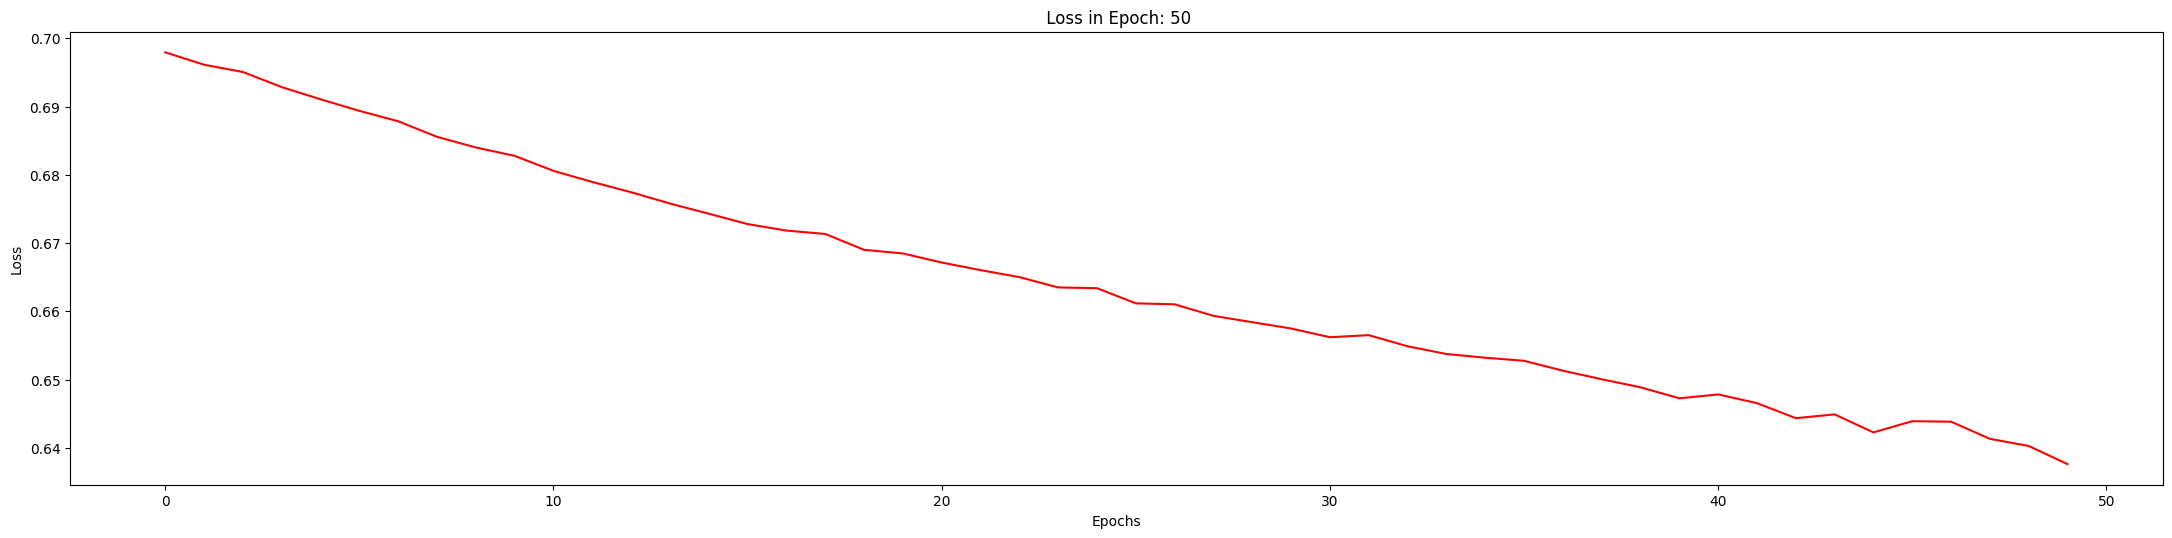

Epoch: 051, Model Loss: 0.6383
Epoch: 052, Model Loss: 0.6375
Epoch: 053, Model Loss: 0.6370
Epoch: 054, Model Loss: 0.6374
Epoch: 055, Model Loss: 0.6362
Epoch: 056, Model Loss: 0.6365
Epoch: 057, Model Loss: 0.6337
Epoch: 058, Model Loss: 0.6325
Epoch: 059, Model Loss: 0.6322
Epoch: 060, Model Loss: 0.6326
Epoch: 061, Model Loss: 0.6322
Epoch: 062, Model Loss: 0.6307
Epoch: 063, Model Loss: 0.6314
Epoch: 064, Model Loss: 0.6300
Epoch: 065, Model Loss: 0.6281
Epoch: 066, Model Loss: 0.6299
Epoch: 067, Model Loss: 0.6273
Epoch: 068, Model Loss: 0.6266
Epoch: 069, Model Loss: 0.6255
Epoch: 070, Model Loss: 0.6257
Epoch: 071, Model Loss: 0.6274
Epoch: 072, Model Loss: 0.6254
Epoch: 073, Model Loss: 0.6260
Epoch: 074, Model Loss: 0.6266
Epoch: 075, Model Loss: 0.6208
Epoch: 076, Model Loss: 0.6236
Epoch: 077, Model Loss: 0.6226
Epoch: 078, Model Loss: 0.6241
Epoch: 079, Model Loss: 0.6214
Epoch: 080, Model Loss: 0.6233
Epoch: 081, Model Loss: 0.6207
Epoch: 082, Model Loss: 0.6221
Epoch: 0

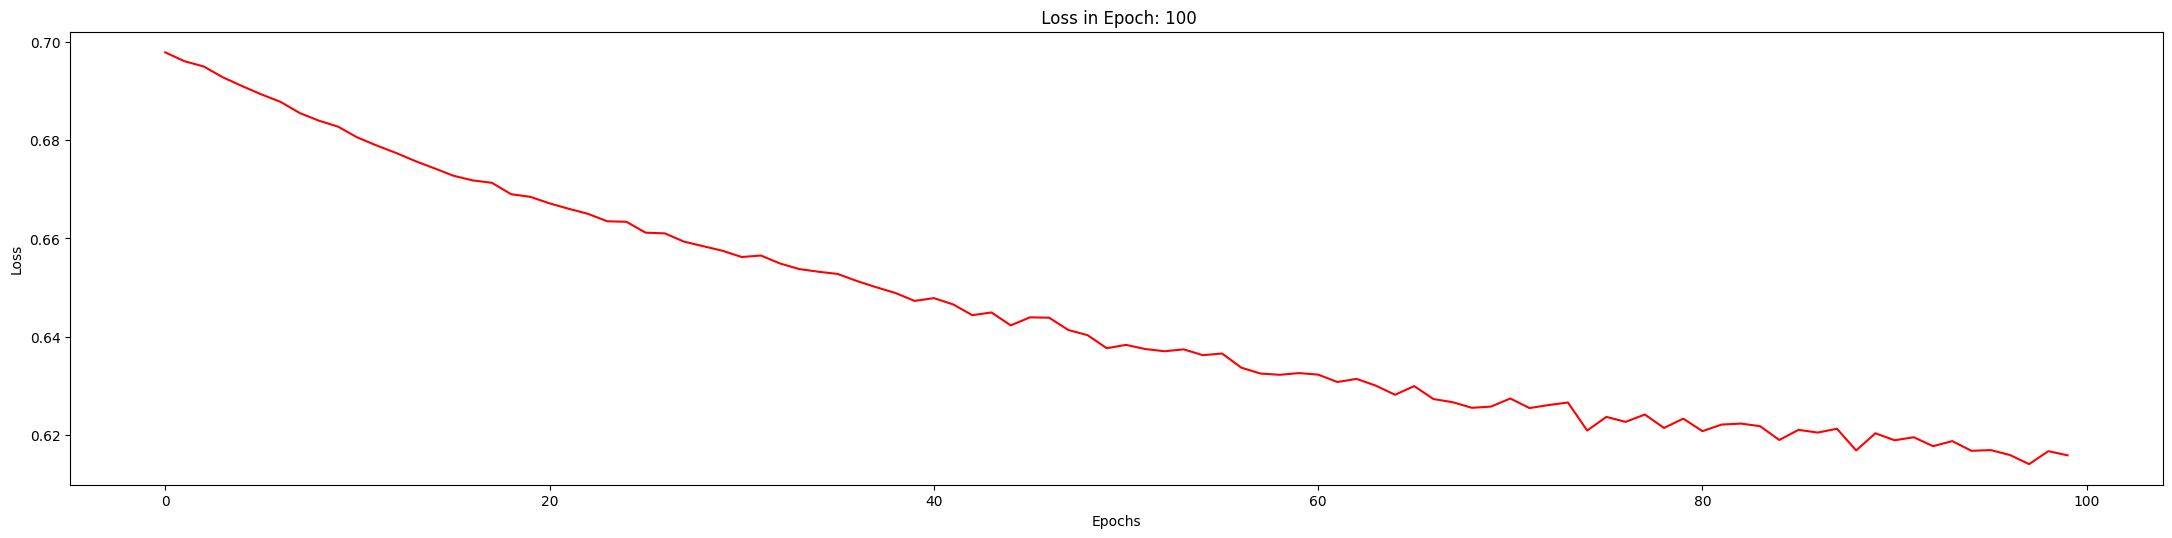

Epoch: 101, Model Loss: 0.6148
Epoch: 102, Model Loss: 0.6135
Epoch: 103, Model Loss: 0.6114
Epoch: 104, Model Loss: 0.6156
Epoch: 105, Model Loss: 0.6095
Epoch: 106, Model Loss: 0.6123
Epoch: 107, Model Loss: 0.6095
Epoch: 108, Model Loss: 0.6113
Epoch: 109, Model Loss: 0.6087
Epoch: 110, Model Loss: 0.6071
Epoch: 111, Model Loss: 0.6095
Epoch: 112, Model Loss: 0.6058
Epoch: 113, Model Loss: 0.6066
Epoch: 114, Model Loss: 0.6057
Epoch: 115, Model Loss: 0.6035
Epoch: 116, Model Loss: 0.6019
Epoch: 117, Model Loss: 0.6066
Epoch: 118, Model Loss: 0.6032
Epoch: 119, Model Loss: 0.6024
Epoch: 120, Model Loss: 0.6015
Epoch: 121, Model Loss: 0.6030
Epoch: 122, Model Loss: 0.6012
Epoch: 123, Model Loss: 0.5954
Epoch: 124, Model Loss: 0.5961
Epoch: 125, Model Loss: 0.5943
Epoch: 126, Model Loss: 0.5942
Epoch: 127, Model Loss: 0.5936
Epoch: 128, Model Loss: 0.5944
Epoch: 129, Model Loss: 0.5895
Epoch: 130, Model Loss: 0.5901
Epoch: 131, Model Loss: 0.5880
Epoch: 132, Model Loss: 0.5880
Epoch: 1

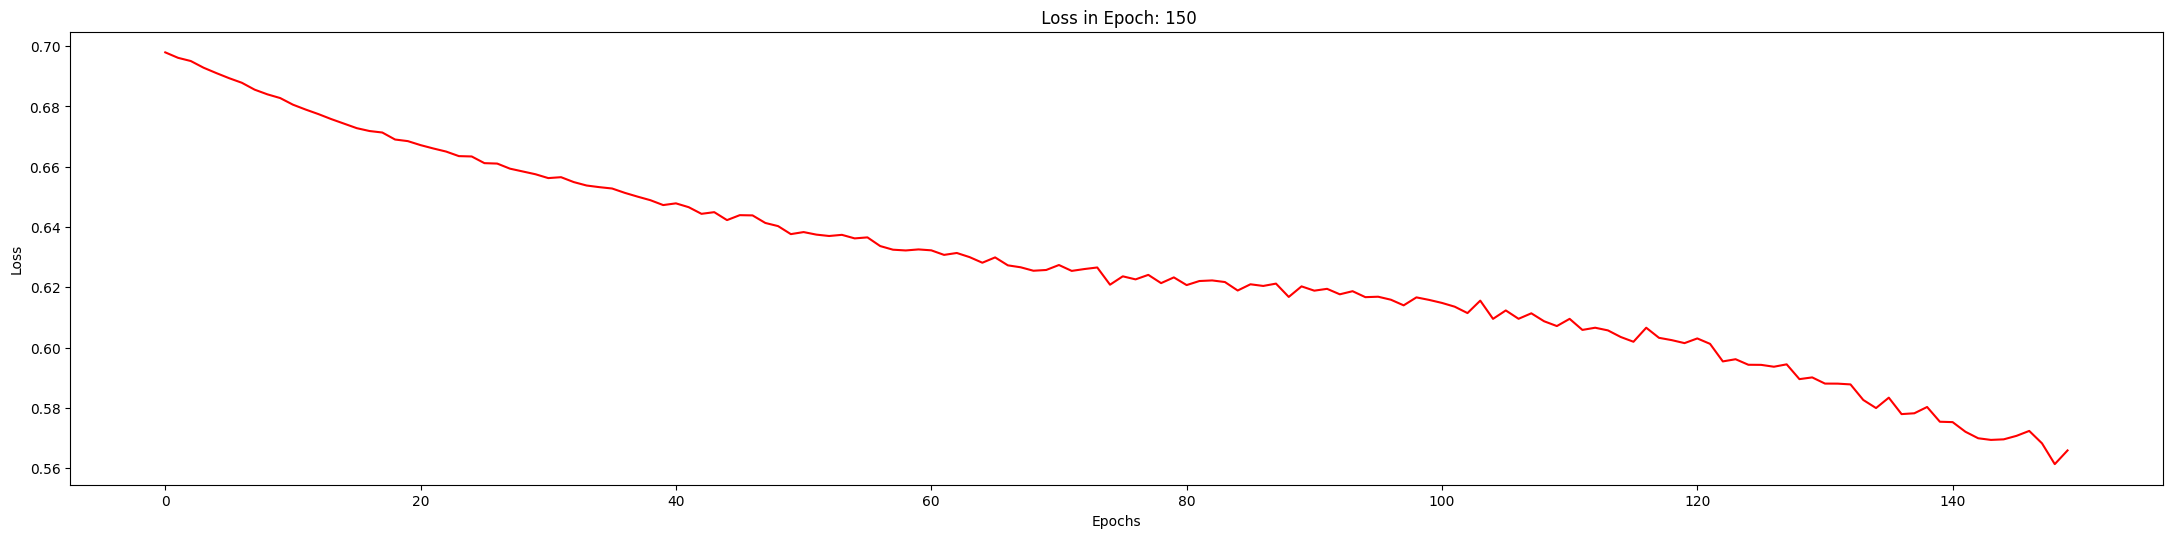

Epoch: 151, Model Loss: 0.5608
Epoch: 152, Model Loss: 0.5629
Epoch: 153, Model Loss: 0.5562
Epoch: 154, Model Loss: 0.5634
Epoch: 155, Model Loss: 0.5591
Epoch: 156, Model Loss: 0.5556
Epoch: 157, Model Loss: 0.5556
Epoch: 158, Model Loss: 0.5608
Epoch: 159, Model Loss: 0.5522
Epoch: 160, Model Loss: 0.5546
Epoch: 161, Model Loss: 0.5590
Epoch: 162, Model Loss: 0.5592
Epoch: 163, Model Loss: 0.5468
Epoch: 164, Model Loss: 0.5534
Epoch: 165, Model Loss: 0.5451
Epoch: 166, Model Loss: 0.5496
Epoch: 167, Model Loss: 0.5477
Epoch: 168, Model Loss: 0.5593
Epoch: 169, Model Loss: 0.5496
Epoch: 170, Model Loss: 0.5474
Epoch: 171, Model Loss: 0.5442
Epoch: 172, Model Loss: 0.5477
Epoch: 173, Model Loss: 0.5481
Epoch: 174, Model Loss: 0.5420
Epoch: 175, Model Loss: 0.5401
Epoch: 176, Model Loss: 0.5410
Epoch: 177, Model Loss: 0.5455
Epoch: 178, Model Loss: 0.5421
Epoch: 179, Model Loss: 0.5488
Epoch: 180, Model Loss: 0.5382
Epoch: 181, Model Loss: 0.5381
Epoch: 182, Model Loss: 0.5423
Epoch: 1

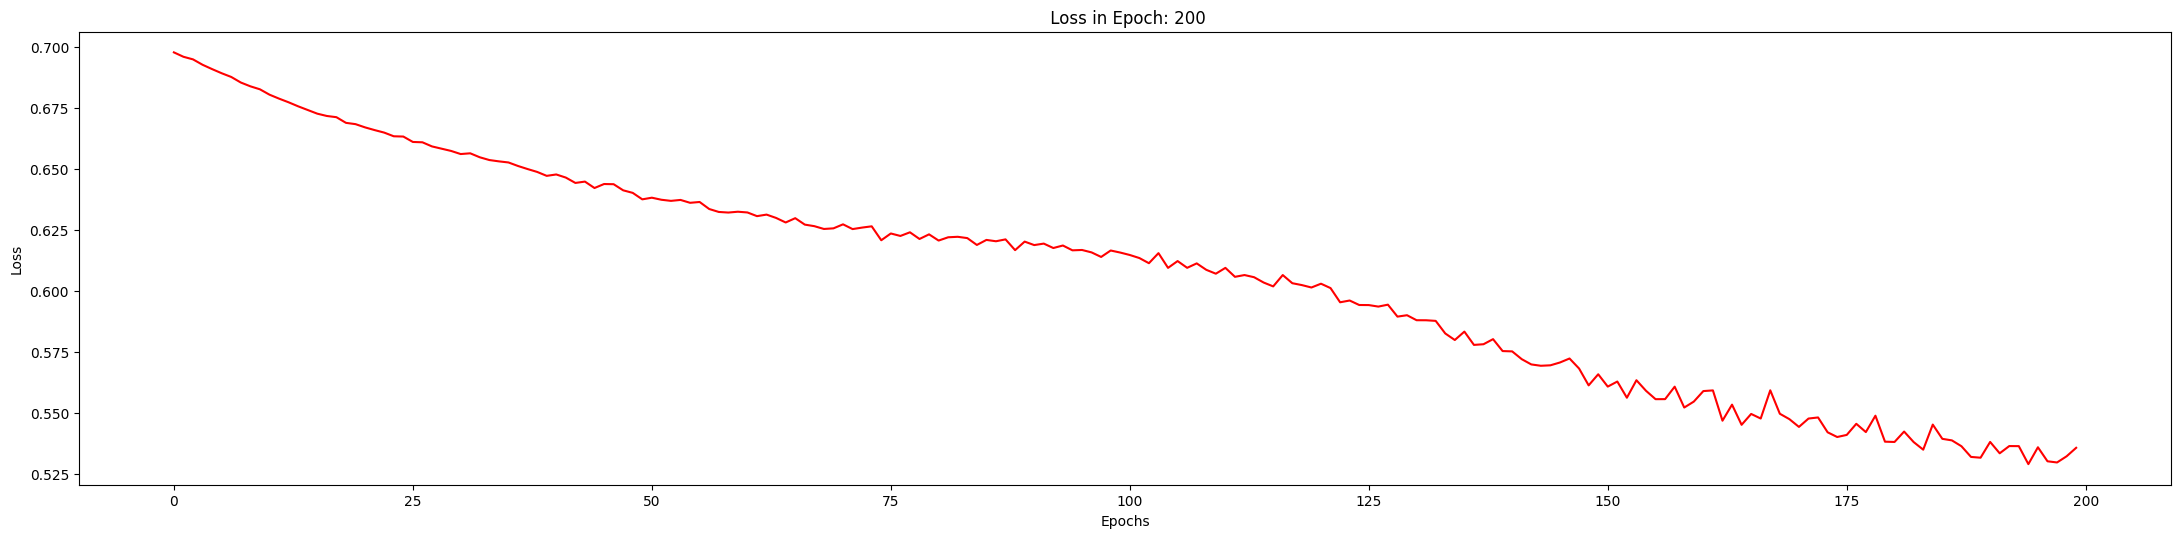

Epoch: 201, Model Loss: 0.5268
Epoch: 202, Model Loss: 0.5323
Epoch: 203, Model Loss: 0.5362
Epoch: 204, Model Loss: 0.5342
Epoch: 205, Model Loss: 0.5216
Epoch: 206, Model Loss: 0.5199
Epoch: 207, Model Loss: 0.5250
Epoch: 208, Model Loss: 0.5320
Epoch: 209, Model Loss: 0.5315
Epoch: 210, Model Loss: 0.5321
Epoch: 211, Model Loss: 0.5250
Epoch: 212, Model Loss: 0.5243
Epoch: 213, Model Loss: 0.5312
Epoch: 214, Model Loss: 0.5258
Epoch: 215, Model Loss: 0.5252
Epoch: 216, Model Loss: 0.5194
Epoch: 217, Model Loss: 0.5221
Epoch: 218, Model Loss: 0.5242
Epoch: 219, Model Loss: 0.5240
Epoch: 220, Model Loss: 0.5247
Epoch: 221, Model Loss: 0.5221
Epoch: 222, Model Loss: 0.5234
Epoch: 223, Model Loss: 0.5278
Epoch: 224, Model Loss: 0.5180
Epoch: 225, Model Loss: 0.5165
Epoch: 226, Model Loss: 0.5141
Epoch: 227, Model Loss: 0.5201
Epoch: 228, Model Loss: 0.5206
Epoch: 229, Model Loss: 0.5201
Epoch: 230, Model Loss: 0.5182
Epoch: 231, Model Loss: 0.5195
Epoch: 232, Model Loss: 0.5132
Epoch: 2

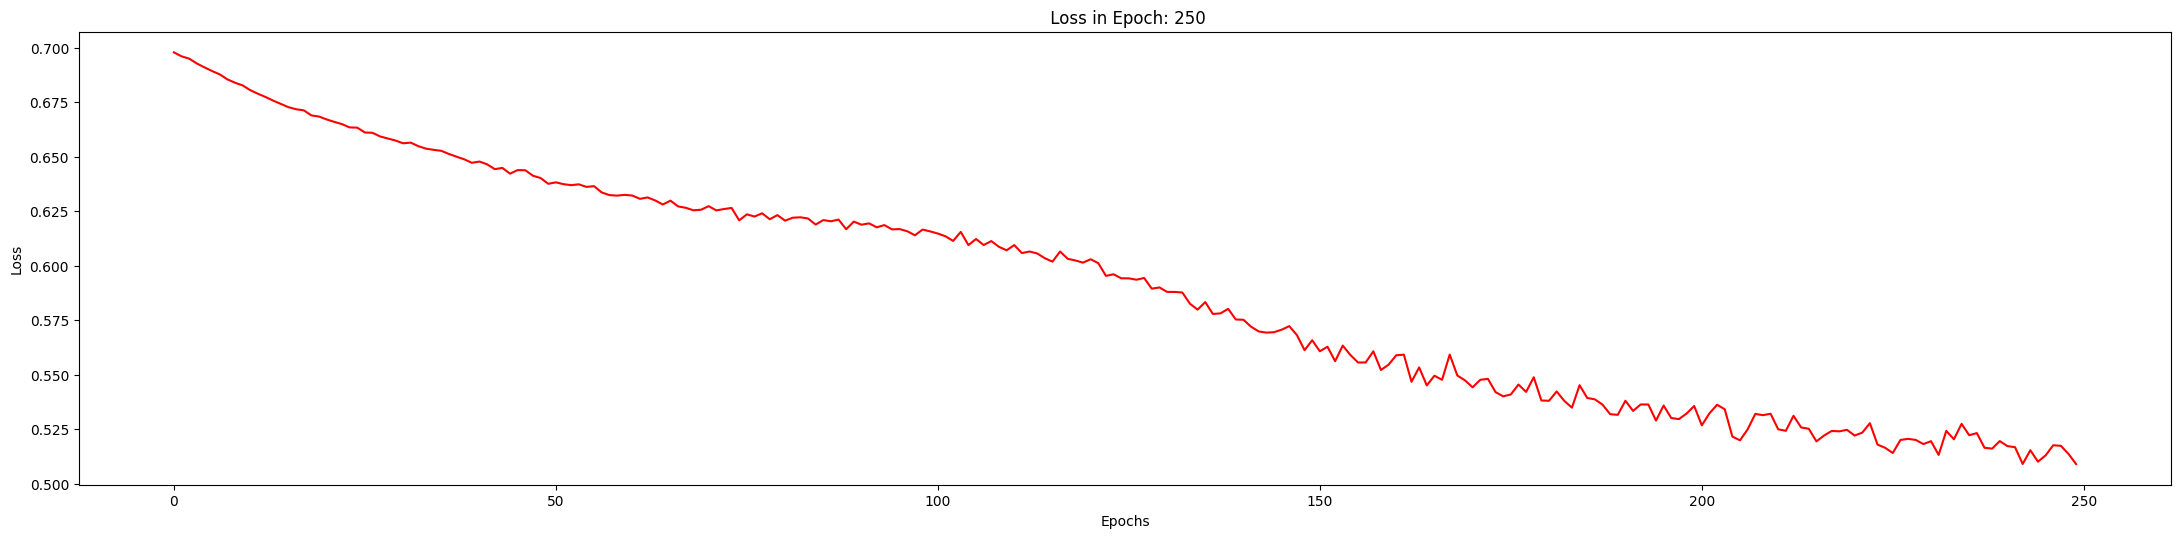

Epoch: 251, Model Loss: 0.5129
Epoch: 252, Model Loss: 0.5143
Epoch: 253, Model Loss: 0.5182
Epoch: 254, Model Loss: 0.5171
Epoch: 255, Model Loss: 0.5101
Epoch: 256, Model Loss: 0.5156
Epoch: 257, Model Loss: 0.5191
Epoch: 258, Model Loss: 0.5100
Epoch: 259, Model Loss: 0.5108
Epoch: 260, Model Loss: 0.5149
Epoch: 261, Model Loss: 0.5098
Epoch: 262, Model Loss: 0.5143
Epoch: 263, Model Loss: 0.5058
Epoch: 264, Model Loss: 0.5129
Epoch: 265, Model Loss: 0.5157
Epoch: 266, Model Loss: 0.5146
Epoch: 267, Model Loss: 0.5092
Epoch: 268, Model Loss: 0.5085
Epoch: 269, Model Loss: 0.5173
Epoch: 270, Model Loss: 0.5045
Epoch: 271, Model Loss: 0.5192
Epoch: 272, Model Loss: 0.5173
Epoch: 273, Model Loss: 0.5109
Epoch: 274, Model Loss: 0.5127
Epoch: 275, Model Loss: 0.5083
Epoch: 276, Model Loss: 0.5120
Epoch: 277, Model Loss: 0.5128
Epoch: 278, Model Loss: 0.5109
Epoch: 279, Model Loss: 0.5179
Epoch: 280, Model Loss: 0.5052
Epoch: 281, Model Loss: 0.5222
Epoch: 282, Model Loss: 0.5164
Epoch: 2

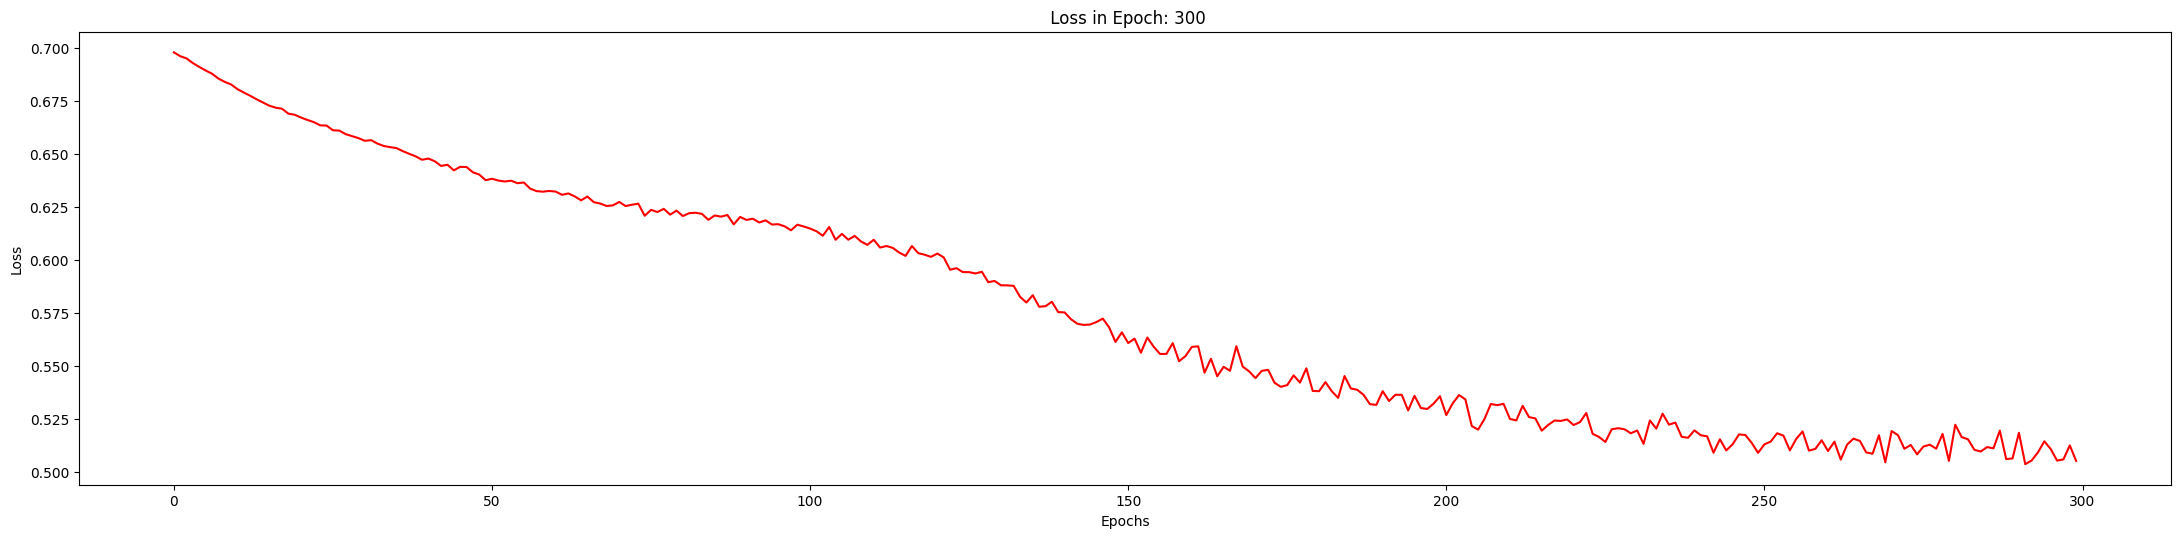

In [15]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [16]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        GNN_Model_test_pred = soft.argmax(dim=1).tolist()[0]
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [17]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.5789


In [18]:
print(GNN_Model)
test_dataloader_example = DataLoader(test_dataset, batch_size=1, shuffle=False)
for batch in test_dataloader_example:
    #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch)
    Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch)
    break
#print(softmaxed_h2)
print(soft)
print(train_dataset[0].x)

GCN_plus_GAP(
  (GConvs): ModuleList(
    (0-1): 2 x GCNConv(7, 7)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (readout): GlobalMeanPool()
  (ffn): Linear(in_features=7, out_features=2, bias=True)
)
tensor([[0.0106, 0.9894]], grad_fn=<SoftmaxBackward0>)
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0.

In [19]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batched_data)
        CAM_test_pred = soft.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [20]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.0028482790000055047, 0.002023498999989215, 0.0015621660000135762, 0.0011035809999953017, 0.0010707060000072488, 0.0010622750000095493, 0.0010640579999972033, 0.001048443000001953, 0.0011439400000199385, 0.0010574400000109563, 0.0010367940000151066, 0.0010871700000052442, 0.0035182999999960884, 0.0017932190000067294, 0.00199101900000187, 0.001119541999997864, 0.0010821060000125726, 0.0010660569999743075, 0.0010418749999985266, 0.0010436139999967509, 0.0010614139999916006, 0.0013203659999874162, 0.0010380790000112938, 0.0010121070000082, 0.000999062000005324, 0.0009887800000001334, 0.0009960849999970378, 0.0009922309999979007, 0.001186454999981379, 0.001065320000009251, 0.0010175119999757953, 0.001174272000014298, 0.00102083999999536, 0.0009876029999986713, 0.0009882669999967675, 0.0009988060000125643, 0.0009801159999938136, 0.0009933300000000145]


In [21]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [22]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.5789473684210527


In [23]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.5178571428571428 Auc_Prc:  0.775375939849624 Acc:  0.5789473684210527 Acc2:  22


## **PGExplainer**

In [24]:

class PGExplainer:
    coeffs = {'edge_size': 0.05,
              'edge_ent': 1.0,
              'temp': [5.0, 2.0],
              'bias': 0.0,
              }
    def __init__(self, Model_Name, classifier_load_index, explainer_save_index, Exp_Epoch, Exp_lr, input_dim, hid_dim, output_dim):
        #self.GNN_Model = GNN_Model
        self.GNN_Model = self.load_model(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name, classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.input_dim = input_dim
        self.explainer_lr = Exp_lr
        self.pgexp_mlp = Sequential(Linear(self.input_dim * 2, 64), ReLU(), Linear(64, 1))
        self.pgexp_mlp_optimizer = torch.optim.Adam(self.pgexp_mlp.parameters(), lr=self.explainer_lr)
        self.explainer_epochs = Exp_Epoch
        #self.criterion = torch.nn.CrossEntropyLoss()
        self.criterion = F.binary_cross_entropy_with_logits
        self.explainer_save_index = explainer_save_index
        self.Explainability_name = 'PGExplainer'
        self.Task_name = 'Graph Classification'
        self.Model_Name = "GCN_plus_GAP"

    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                         classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                         output_dim=output_dim)
            return GNN_Model
        else:
            GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim,
                                                   hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2,
                                                   Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):
        GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier" + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch


    def explainer_loss(self, By_Perturbation_predicted_label, predicted_label):
        loss_per_epoch = self.criterion(By_Perturbation_predicted_label, predicted_label)
        return loss_per_epoch


    def train_step_explainer(self, merged_embeddings_list_batchs, GNN_Model, your_dataset, temperature, GNN_Model_preds_NOT_MASKED, target_class):

        self.pgexp_mlp.train()
        self.pgexp_mlp.zero_grad()
        for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
            explaier_outputs = self.pgexp_mlp(batched_merged_embeddings).view(-1)

            edge_mask = self.binary_concrete(explaier_outputs, temperature)

            #print(edge_mask.size(), len(batched_graphs.edge_index[0]))
            self.apply_masks(GNN_Model, edge_mask, batched_graphs.edge_index, apply_sigmoid=True)

            Output_of_Hidden_Layers_MASKED, pooling_layer_output_MASKED, ffn_output_MASKED, soft_MASKED = GNN_Model(batched_graphs)
            #print("batched_preds_NOT_MASKED: ", batched_preds_NOT_MASKED, "   ", "batched_preds_NOT_MASKED.argmax(dim=1): ", batched_preds_NOT_MASKED.argmax(dim=1))
            if target_class == "correct":
                batch_loss = self.explainer_loss(soft_MASKED.argmax(dim=1).to(torch.float32), batched_preds_NOT_MASKED.argmax(dim=1).to(torch.float32))
            else:
                batch_loss = self.explainer_loss(soft_MASKED.argmin(dim=1).to(torch.float32), batched_preds_NOT_MASKED.argmin(dim=1).to(torch.float32))
            batch_loss.requires_grad = True
            batch_loss.backward(retain_graph=True)
            self.pgexp_mlp_optimizer.step()

        return edge_mask

    def train_explainer(self, GNN_Model, your_dataset, target_class):
        edge_masks_per_epoch = []
        #self.clear_masks(GNN_Model)
        merged_embeddings_list = self.get_merged_embeddings(GNN_Model, your_dataset)
        GNN_Model_preds_NOT_MASKED = []
        for batch_of_graphs in your_dataset:
            Output_of_Hidden_Layers_NOT_MASKED, pooling_layer_output_NOT_MASKED, ffn_output_NOT_MASKED, soft_NOT_MASKED = GNN_Model(batch_of_graphs)
            GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)

        for epoch in range(self.explainer_epochs):
            print("Epoch: ", epoch)
            temperature = self.compute_temp(epoch)
            #print("temperature: ", temperature)
            edge_mask = self.train_step_explainer(merged_embeddings_list, GNN_Model, your_dataset, temperature, GNN_Model_preds_NOT_MASKED, target_class)
            edge_masks_per_epoch.append(edge_mask)

            if (epoch + 1) == self.explainer_save_index:
                torch.save({'epoch': epoch+1, 'model_state_dict': self.pgexp_mlp.state_dict(), 'optimizer_state_dict': self.pgexp_mlp_optimizer.state_dict()}, "/content/drive/My Drive/Explainability Methods/" + str(self.Explainability_name) + " on " + str(self.Task_name) + "/Model/" + str(self.Model_Name) + "_Model_classifier_PGExplainer_MLP_" + str(epoch + 1) + "_epochs_" + str(target_class) + ".pt")
        self.clear_masks(GNN_Model)

    def test_explainer(self, GNN_Model, your_dataset, pgexp_mlp):
        predicted_labels_MASKED = []
        edge_masks = []
        merged_embeddings_list_batchs = self.get_merged_embeddings(GNN_Model, your_dataset)
        GNN_Model_preds_NOT_MASKED = []
        pgexp_mlp.eval()
        for batch_of_graphs in your_dataset:
            Output_of_Hidden_Layers_NOT_MASKED, pooling_layer_output_NOT_MASKED, ffn_output_NOT_MASKED, soft_NOT_MASKED = GNN_Model(batch_of_graphs)
            GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)
        for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
            explaier_outputs = pgexp_mlp(batched_merged_embeddings).view(-1)

            temperature = 1
            edge_mask = self.binary_concrete(explaier_outputs, temperature)
            self.apply_masks(GNN_Model, edge_mask, batched_graphs.edge_index, apply_sigmoid=True)
            edge_masks.append(edge_mask)

            Output_of_Hidden_Layers_MASKED, pooling_layer_output_MASKED, ffn_output_MASKED, soft_MASKED = GNN_Model(batched_graphs)
            #print(soft_MASKED.argmax(dim=1))
            predicted_labels_MASKED.append(torch.squeeze(soft_MASKED.argmax(dim=1)).tolist())
        self.clear_masks(GNN_Model)
        return predicted_labels_MASKED, edge_masks

    def apply_masks(self, model, mask, edge_index, apply_sigmoid):
        loop_mask = edge_index[0] != edge_index[1]

        for module in model.modules():
            if isinstance(module, MessagePassing):

                if (not isinstance(mask, Parameter)
                        and '_edge_mask' in module._parameters):
                    mask = Parameter(mask)

                module.explain = True
                module._edge_mask = mask
                module._loop_mask = loop_mask
                module._apply_sigmoid = apply_sigmoid
                #print(module._edge_mask)

    def clear_masks(self, model):

        for module in model.modules():
            if isinstance(module, MessagePassing):
                module.explain = False
                module._edge_mask = None
                module._loop_mask = None
                module._apply_sigmoid = True
        return module

    def get_merged_embeddings(self, GNN_Model, your_dataset):
        new_embeddings_list = []
        merged_embeddings_list = []
        for batched_graphs in your_dataset:
            new_graph_by_masks = deepcopy(batched_graphs.detach())

            new_embeddings, GNN_Model_explain_predicted_labels = self.get_hopped_embeddings(GNN_Model, new_graph_by_masks)
            new_embeddings_list.append(new_embeddings)

            merged_embeddings = self.edge_embeddings(new_embeddings, new_graph_by_masks.edge_index)
            merged_embeddings_list.append(merged_embeddings)

        return merged_embeddings_list


    def edge_embeddings(self, embedding, edge_index):
        Zs = [embedding[edge_index[0]], embedding[edge_index[1]]]
        return torch.cat(Zs, dim=-1)

    def get_hopped_embeddings(self, GNN_Model, batch_of_graphs):
        GNN_Model.eval()
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        GNN_Model_test_pred = soft.argmax(dim=1)
        return Output_of_Hidden_Layers[-1], GNN_Model_test_pred

    def compute_temp(self, epoch):
        temp = self.coeffs['temp']
        return temp[0] * pow(temp[1] / temp[0], epoch / self.explainer_epochs)

    def binary_concrete(self, explaier_outputs, temperature):
        bias = self.coeffs['bias']
        eps = (1 - 2 * bias) * torch.rand_like(explaier_outputs) + bias
        return torch.sigmoid((eps.log() - (1 - eps).log() + explaier_outputs) / temperature)
    def load_explainer_mlp(self, Exp_Load_index, target_class):
        pgexp_mlp = Sequential(Linear(self.input_dim * 2, 64), ReLU(), Linear(64, 1))
        pgexp_mlp_optimizer = torch.optim.Adam(self.pgexp_mlp.parameters(), lr=self.explainer_lr)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(self.Explainability_name) + " on " + str(self.Task_name) + "/Model/" + str(self.Model_Name) + "_Model_classifier_PGExplainer_MLP_" + str(Exp_Load_index)+"_epochs_" + str(target_class) + ".pt")
        pgexp_mlp.load_state_dict(checkpoint['model_state_dict'])
        pgexp_mlp_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        return pgexp_mlp, pgexp_mlp_optimizer

    def __call__(self, ExTrain_or_ExTest,  Exp_Load_index, your_dataset, target_class):
        if ExTrain_or_ExTest == "train":
            self.train_explainer(self.GNN_Model, your_dataset, target_class)
        elif ExTrain_or_ExTest == "test":
            pgexp_mlp, pgexp_mlp_optimizer = self.load_explainer_mlp(Exp_Load_index=Exp_Load_index, target_class="correct")
            predicted_labels, edge_masks = self.test_explainer(self.GNN_Model, your_dataset, pgexp_mlp)
            print("  correct predicted_labels: ", predicted_labels)
            print("edge_masks: ", edge_masks)

            pgexp_mlp, pgexp_mlp_optimizer = self.load_explainer_mlp(Exp_Load_index=Exp_Load_index, target_class="incorrect")
            predicted_labels, edge_masks = self.test_explainer(self.GNN_Model, your_dataset, pgexp_mlp)
            print("incorrect predicted_labels: ", predicted_labels)
            print("edge_masks: ", edge_masks)
        else:
            print("recheck")


target_class = 'correct'
ExTrain_or_ExTest = 'test'
EXP = PGExplainer(Model_Name="GCN_plus_GAP", classifier_load_index=300, explainer_save_index=10000, Exp_Epoch=100, Exp_lr=0.001, input_dim=len(dataset[0].x[0]), hid_dim=7, output_dim=2)
EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=100, your_dataset=[test_dataset[0]], target_class=target_class)

#print("Before Training Explainer: ", self.GNN_Model.GConvs[0].lin.weight)
#print("After Training Explainer: ", self.GNN_Model.GConvs[0].lin.weight)
#t1_start = perf_counter()
#EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=100, your_dataset=test_dataloader, target_class="correct")
#EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=100, your_dataset=test_dataloader, target_class="incorrect")
#t2_start = perf_counter()
#print("duration: ", (t2_start - t1_start)/(len(test_dataset)*2))

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
  correct predicted_labels:  [1]
edge_masks:  [tensor([0.8409, 0.8831, 0.7422, 0.1667, 0.2448, 0.0986, 0.8261, 0.4474, 0.6034,
        0.8025, 0.6057, 0.3773, 0.3122, 0.6057, 0.7106, 0.9121, 0.6045, 0.9321,
        0.4272, 0.8317, 0.9200, 0.1421, 0.6091, 0.6286, 0.4570, 0.4674, 0.6079,
        0.4580, 0.9250, 0.7270, 0.4527, 0.5178, 0.1168, 0.8992, 0.5975, 0.6588,
        0.8862, 0.6434], grad_fn=<SigmoidBackward0>)]
incorrect predicted_labels:  [1]
edge_masks:  [tensor([0.3411, 0.8703, 0.2065, 0.8414, 0.4122, 0.5227, 0.1868, 0.9145, 0.3945,
        0.5528, 0.8533, 0.8989, 0.1997, 0.7633, 0.6542, 0.2187, 0.1202, 0.8528,
        0.4987, 0.4644, 0.1160, 0.8282, 0.9992, 0.5082, 0.7882, 0.5197, 0.8943,
        0.2931, 0.4484, 0.4054, 0.5048, 0.5607, 0.2801, 0.7550, 0.4792, 0.6589,
        0.0578, 0.1280], grad_fn=<SigmoidBackward0>)]


In [25]:
GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=2, Bias=classifier_bias, act_fun='ReLu', Weight_Initializer=1,
                                       dropout_rate=classifier_dropout)
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier" + str(300)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
ReLu is Selected.


In [26]:
pgexp_mlp = Sequential(Linear(7 * 2, 64), ReLU(), Linear(64, 1))
pgexp_mlp_optimizer = torch.optim.Adam(pgexp_mlp.parameters(), lr=0.001)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier_PGExplainer_MLP_" + str(100)+"_epochs_" + str("correct") + ".pt")
pgexp_mlp.load_state_dict(checkpoint['model_state_dict'])
pgexp_mlp_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [27]:
pgexp_mlp_incorrect = Sequential(Linear(7 * 2, 64), ReLU(), Linear(64, 1))
pgexp_mlp_optimizer_incorrect = torch.optim.Adam(pgexp_mlp.parameters(), lr=0.001)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier_PGExplainer_MLP_" + str(100)+"_epochs_" + str("incorrect") + ".pt")
pgexp_mlp_incorrect.load_state_dict(checkpoint['model_state_dict'])
pgexp_mlp_optimizer_incorrect.load_state_dict(checkpoint['optimizer_state_dict'])

In [28]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:
            #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
            #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
            #prob = F.softmax(logits, dim=1)

            preds.append(soft.cpu().detach())
    else:

        your_model.eval()
        for batched_data, edge_mask in zip(your_dataset, masked):
            #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
            #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
            apply_masks(your_model, edge_mask, batched_data.edge_index, apply_sigmoid=True)
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
            #prob = F.softmax(logits, dim=1)

            preds.append(soft.cpu().detach())
        clear_masks(your_model)


    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())
    #preds = torch.cat(preds).cpu().numpy()
    #preds = preds[:, 1]
    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc


def is_salient(score, importance_threshold):
    if importance_threshold <= score:
        return True
    else:
        return False

def clear_masks(model):

    for module in model.modules():
        if isinstance(module, MessagePassing):
            module.explain = False
            module._edge_mask = None
            module._loop_mask = None
            module._apply_sigmoid = True
    return module

def apply_masks(model, mask, edge_index, apply_sigmoid):
    loop_mask = edge_index[0] != edge_index[1]

    for module in model.modules():
        if isinstance(module, MessagePassing):

            if (not isinstance(mask, Parameter)
                    and '_edge_mask' in module._parameters):
                mask = Parameter(mask)

            module.explain = True
            module._edge_mask = mask
            module._loop_mask = loop_mask
            module._apply_sigmoid = apply_sigmoid
            #print(module._edge_mask)


def binary_concrete(explaier_outputs, temperature):
    bias = 0.0
    eps = (1 - 2 * bias) * torch.rand_like(explaier_outputs) + bias
    return torch.sigmoid((eps.log() - (1 - eps).log() + explaier_outputs) / temperature)

def get_hopped_embeddings(GNN_Model, batch_of_graphs):
    GNN_Model.eval()
    Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
    GNN_Model_test_pred = soft.argmax(dim=1)
    return Output_of_Hidden_Layers[-1], GNN_Model_test_pred

def edge_embeddings(embedding, edge_index):
    Zs = [embedding[edge_index[0]], embedding[edge_index[1]]]
    return torch.cat(Zs, dim=-1)
def get_merged_embeddings(GNN_Model, your_dataset):
    new_embeddings_list = []
    merged_embeddings_list = []
    for batched_graphs in your_dataset:
        new_graph_by_masks = deepcopy(batched_graphs.detach())

        new_embeddings, GNN_Model_explain_predicted_labels = get_hopped_embeddings(GNN_Model, new_graph_by_masks)
        new_embeddings_list.append(new_embeddings)

        merged_embeddings = edge_embeddings(new_embeddings, new_graph_by_masks.edge_index)
        merged_embeddings_list.append(merged_embeddings)

    return merged_embeddings_list
def test_explainer(GNN_Model, your_dataset, pgexp_mlp):
    predicted_labels_MASKED = []
    merged_embeddings_list_batchs = get_merged_embeddings(GNN_Model, your_dataset)
    GNN_Model_preds_NOT_MASKED = []
    Edge_Masks = []
    pgexp_mlp.eval()
    for batch_of_graphs in your_dataset:
        Output_of_Hidden_Layers_NOT_MASKED, pooling_layer_output_NOT_MASKED, ffn_output_NOT_MASKED, soft_NOT_MASKED = GNN_Model(batch_of_graphs)
        GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)
    for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
        explaier_outputs = pgexp_mlp(batched_merged_embeddings).view(-1)

        temperature = 1
        edge_mask = binary_concrete(explaier_outputs, temperature)
        Edge_Masks.append(edge_mask)
        #apply_masks(GNN_Model, edge_mask, batched_graphs.edge_index, apply_sigmoid=True)

        #Output_of_Hidden_Layers_MASKED, pooling_layer_output_MASKED, ffn_output_MASKED, soft_MASKED = GNN_Model(batched_graphs)

        #predicted_labels_MASKED.append(torch.squeeze(soft_MASKED.argmax(dim=1)).tolist())
    #clear_masks(GNN_Model)
    #return predicted_labels_MASKED
    return Edge_Masks

def drop_important_nodes(your_dataset, importance_threshold):
    attribution_scores = []
    t1 = perf_counter()
    Edge_Masks_Dropped = test_explainer(GNN_Model, your_dataset, pgexp_mlp)
    attribution_time = perf_counter()-t1
    Edge_Masks_original = []
    for tensor in Edge_Masks_Dropped:
        Edge_Masks_original.append(deepcopy(tensor.detach()))
    #print("edge masks: ",len(Edge_Masks))
    for edge_mask in Edge_Masks_Dropped:
        #print("edge_mask: ", edge_mask)
        importance_indices = edge_mask > importance_threshold * (max(edge_mask)-min(edge_mask))
        edge_mask[importance_indices] = 0
        #print("edge_mask updated: ", edge_mask)
        #break
    print("original Edge_masks: ", Edge_Masks_original[0])
    print("dropped important Edge_masks: ", Edge_Masks_Dropped[0])

    return Edge_Masks_original, Edge_Masks_Dropped, attribution_time/len(test_dataset)


def Fidelity_computation(your_model, your_dataset, importance_threshold):
    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)
    Edge_Masks_original, Edge_Masks_Dropped, attribution_time = drop_important_nodes(your_dataset, importance_threshold)
    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, Edge_Masks_Dropped)


    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)
    return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes, attribution_time


def binarize_saliency_maps(correct_mask, incorrect_mask, importance_threshold):
    correct_binary_score_list = []
    incorrect_binary_score_list = []

    for edge_mask in correct_mask:
        correct_binary_score = ''
        importance_indices = edge_mask > importance_threshold * (max(edge_mask)-min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                correct_binary_score += '1'
            else:
                correct_binary_score += '0'
        correct_binary_score_list.append(correct_binary_score)

    for edge_mask in incorrect_mask:
        incorrect_binary_score = ''
        importance_indices = edge_mask > importance_threshold * (max(edge_mask)-min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                incorrect_binary_score += '1'
            else:
                incorrect_binary_score += '0'
        incorrect_binary_score_list.append(incorrect_binary_score)


    return correct_binary_score_list, incorrect_binary_score_list

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def compute_contrastivity(your_model, your_dataset, pgexp_mlp, pgexp_mlp_incorrect, importance_threshold):
    correct_masks = test_explainer(GNN_Model, your_dataset, pgexp_mlp)
    incorrect_masks = test_explainer(GNN_Model, your_dataset, pgexp_mlp_incorrect)

    correct_binary_score, incorrect_binary_score = binarize_saliency_maps(correct_masks, incorrect_masks, importance_threshold)
    print("  correct_binary_score: ", correct_binary_score)
    print("incorrect_binary_score: ", incorrect_binary_score)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(correct_binary_score, incorrect_binary_score):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    return statistics.mean(h_dist_list)

def binarize_attributions(correct_mask, incorrect_mask, importance_threshold):
    correct_binary_score_list = []
    incorrect_binary_score_list = []

    for edge_mask in correct_mask:
        correct_binary_score = []
        importance_indices = edge_mask > importance_threshold
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                correct_binary_score.append(1)
            else:
                correct_binary_score.append(0)
        correct_binary_score_list.append(correct_binary_score)

    for edge_mask in incorrect_mask:
        incorrect_binary_score = []
        importance_indices = edge_mask > importance_threshold
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                incorrect_binary_score.append(1)
            else:
                incorrect_binary_score.append(0)
        incorrect_binary_score_list.append(incorrect_binary_score)


    return correct_binary_score_list, incorrect_binary_score_list
def compute_sparsity(your_model, your_dataset, pgexp_mlp, pgexp_mlp_incorrect, importance_threshold):
    correct_masks = test_explainer(GNN_Model, your_dataset, pgexp_mlp)
    incorrect_masks = test_explainer(GNN_Model, your_dataset, pgexp_mlp_incorrect)

    correct_binary_score, incorrect_binary_score = binarize_attributions(correct_masks, incorrect_masks, importance_threshold)
    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(correct_binary_score, incorrect_binary_score):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
        sparsity_list.append(sparsity)
    return statistics.mean(sparsity_list)

In [ ]:
sparsity_score = compute_sparsity(GNN_Model, test_dataloader, pgexp_mlp, pgexp_mlp_incorrect, 0.5)
print("sparsity_score: ", sparsity_score)

In [ ]:
contrastivity_score = compute_contrastivity(GNN_Model, test_dataloader, pgexp_mlp, pgexp_mlp_incorrect, 0.5)
print("contrastivity_score: ", contrastivity_score)

  correct_binary_score:  ['01010101101101111000000110110111100111', '1100100011101101000001010000', '1011010001111000010111001000', '01011000000000111111010011', '1001111000111000101110001011010111000011100100', '11011100111011001111011101010001100010', '00000011110111101111001101011110100101001100000000', '011100101111000110110110110101', '010100001010100111101001110111000010', '01011110011000101100011111101001', '000111010111001001100101', '01100010011011111111100010101000010001000001', '110100000010101000000111001011101111010100011000', '010100001011001111001100101010100100', '111011011100100000000011001000111111100010001001010001', '11100011011110110101', '1010001000000101110111011111110100', '11000101000100011000010000011100100111001101100110110011', '100100110100110111111110001011110111', '100000110000111010111011011000011000100100000100011011', '1111110000110101001100000011', '0000100001110100101010000111111001', '10000001101011100011100100010101000110101101100100000100', '11111

In [ ]:
x = ['1111111111111111111111111111']
y = ['1111111111111111111111111111']
print(len(x[0]))
print(hamming(x, y))

28
0.0


In [ ]:
fid_score, attribution_time = Fidelity_computation(GNN_Model, test_dataloader , 0.5)
print("Fidelity: ", fid_score)
print("attribution_time: ", attribution_time)

auc_roc_before_droping_important_nodes:  0.5982142857142858
original Edge_masks:  tensor([0.5466, 0.2549, 0.5853, 0.4387, 0.3493, 0.4757, 0.3793, 0.4045, 0.3335,
        0.2329, 0.8524, 0.8661, 0.3277, 0.1069, 0.4419, 0.4716, 0.4898, 0.8189,
        0.7874, 0.0660, 0.6977, 0.3582, 0.5997, 0.8495, 0.2747, 0.6843, 0.0183,
        0.0502, 0.5080, 0.8091, 0.0554, 0.1909, 0.0518, 0.8619, 0.2959, 0.3800,
        0.5988, 0.0311])
dropped important Edge_masks:  tensor([0.0000, 0.2549, 0.0000, 0.0000, 0.3493, 0.0000, 0.3793, 0.4045, 0.3335,
        0.2329, 0.0000, 0.0000, 0.3277, 0.1069, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0660, 0.0000, 0.3582, 0.0000, 0.0000, 0.2747, 0.0000, 0.0183,
        0.0502, 0.0000, 0.0000, 0.0554, 0.1909, 0.0518, 0.0000, 0.2959, 0.3800,
        0.0000, 0.0311], grad_fn=<IndexPutBackward0>)
auc_roc_after_droping_important_nodes:  0.5654761904761905
Fidelity:  0.032738095238095344
attribution_time:  0.006724714236832752


In [ ]:
x = torch.rand(1,5)
print(x)
zero_indices = x >= 0.5
#non_zero_indices = tensor != 0
#tensor[non_zero_indices] = 0
x[zero_indices] = 0
print(x)

tensor([[0.3831, 0.4218, 0.7652, 0.9791, 0.3440]])
tensor([[0.3831, 0.4218, 0.0000, 0.0000, 0.3440]])


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid_score, contrastivity_score, sparsity_score, attribution_time, statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)

In [ ]:
class evalaution_of_xmethods_fidelity_plus(object):
    def __init__(self, a_trained_model, test_data):
        super(evalaution_of_xmethods_fidelity_plus, self).__init__()
        self.a_trained_model = a_trained_model
        self.test_data = test_data



    def is_salient(self, score, importance_threshold):
        if importance_threshold == score == 0:
            return True
        if importance_threshold == score == 1:
            return False
        if importance_threshold < score:
            return True
        else:
            return False


    def Compute_ROC_AUC(self, your_model, your_dataset):
        preds = []
        reals = []

        your_model.eval()
        for batched_data in your_dataset:
            if your_model.__class__.__name__ == "GCN_plus_GAP":
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, prediction = your_model(batched_data)
            else:
                print("Model Name is not valid.")

            preds.append(prediction.cpu().detach())

        for i in range(len(your_dataset)):
            reals.append(your_dataset[i].y.cpu().detach().tolist())

        preds = torch.cat(preds)
        preds, max_idxs = torch.max(preds[:], dim=1)

        auc_roc = metrics.roc_auc_score(reals, preds, average='macro')
        return auc_roc


    def drop_important_node_features(self, your_dataset, importance_threshold, saliency_maps):
        attribution_scores = saliency_maps
        occluded_GNNgraph_list = []

        for i in range(len(attribution_scores)):
            sample_graph = deepcopy(your_dataset[i])
            for j in range(len(attribution_scores[i])):
                for k in range(len(attribution_scores[i][j])):
                    if self.is_salient(attribution_scores[i][j][k], importance_threshold):
                        sample_graph.x[j][k] = 0
            occluded_GNNgraph_list.append(sample_graph)
        return occluded_GNNgraph_list

    def drop_important_nodes(self, your_dataset, importance_threshold, saliency_maps):
        attribution_scores = saliency_maps
        occluded_GNNgraph_list = []

        for i in range(len(attribution_scores)):
            sample_graph = deepcopy(your_dataset[i])
            for j in range(len(attribution_scores[i])):
                if self.is_salient(attribution_scores[i][j], importance_threshold):
                    sample_graph.x[j][:] = 0
            occluded_GNNgraph_list.append(sample_graph)
        return occluded_GNNgraph_list


    def Fidelity_node_features(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_important_nodes = self.Compute_ROC_AUC(self.a_trained_model, your_dataset)
        new_graph_dataset = self.drop_important_node_features(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_important_nodes = self.Compute_ROC_AUC(self.a_trained_model, new_graph_dataset)

        return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes

    def Fidelity_node(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_important_nodes = self.Compute_ROC_AUC(self.a_trained_model, your_dataset)
        new_graph_dataset = self.drop_important_nodes(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_important_nodes = self.Compute_ROC_AUC(self.a_trained_model, new_graph_dataset)

        return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes

    def drop_important_edges(self, your_dataset, importance_threshold, Edge_Masks_Dropped):
        attribution_scores = []
        t1 = perf_counter()
        #Edge_Masks_Dropped = test_explainer(GNN_Model, your_dataset, pgexp_mlp)
        attribution_time = perf_counter()-t1
        Edge_Masks_original = []
        for tensor in Edge_Masks_Dropped:
            Edge_Masks_original.append(deepcopy(tensor.detach()))

        for edge_mask in Edge_Masks_Dropped:

            importance_indices = edge_mask > importance_threshold * (max(edge_mask)-min(edge_mask))
            edge_mask[importance_indices] = 0



        return Edge_Masks_original, Edge_Masks_Dropped, attribution_time/len(test_dataset)

    def Fidelity_edge(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_important_nodes = self.Compute_ROC_AUC_edge(self.a_trained_model, your_dataset, False)
        Edge_Masks_original, Edge_Masks_Dropped, attribution_time = self.drop_important_edges(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_important_nodes = self.Compute_ROC_AUC_edge(self.a_trained_model, your_dataset, Edge_Masks_Dropped)

        return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes, attribution_time

    def normalize_saliency_node_features_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                node_gradients = []
                for dim in node_grads:
                    node_gradients.append((dim-min(node_grads))/(max(node_grads)-min(node_grads)))
                new_gradients.append(node_gradients)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def normalize_saliency_node_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                val = (node_grads-min(graph_grads))/(max(graph_grads)-min(graph_grads)) if (max(graph_grads)-min(graph_grads)) != 0 else 0
                new_gradients.append(val)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def clear_masks(self, model):

        for module in model.modules():
            if isinstance(module, MessagePassing):
                module.explain = False
                module._edge_mask = None
                module._loop_mask = None
                module._apply_sigmoid = True
        return module

    def Compute_ROC_AUC_edge(self, your_model, your_dataset, masked):
        preds = []
        reals = []
        if masked == False:
            your_model.eval()
            for batched_data in your_dataset:
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                #prob = F.softmax(logits, dim=1)

                preds.append(soft.cpu().detach())
        else:

            your_model.eval()
            for batched_data, edge_mask in zip(your_dataset, masked):
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
                if your_model.__class__.__name__ == "GCN_plus_GAP":
                    apply_masks(your_model, edge_mask, batched_data.edge_index, apply_sigmoid=True)
                    Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                    #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                    #prob = F.softmax(logits, dim=1)

                    preds.append(soft.cpu().detach())
                    self.clear_masks(your_model)


        for i, batched_graph in enumerate(your_dataset):
            reals.append(batched_graph.y.cpu().detach().tolist())

        preds = torch.cat(preds)
        preds, max_idxs = torch.max(preds[:], dim=1)

        roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
        return roc_auc

    def normalize_saliency_edge_based(self, saliency_maps):
        Graphs_new_gradients = []

        for graph_grads in saliency_maps:
            #new_gradients = []
            for edge_grads in graph_grads:
                edge_grads = (edge_grads-torch.min(graph_grads))/(torch.max(graph_grads)-torch.min(graph_grads)) if (torch.max(graph_grads)-torch.min(graph_grads)) != 0 else 0
                #new_gradients.append(val)
            Graphs_new_gradients.append(graph_grads)

        return Graphs_new_gradients


    def my_fidelity(self, saliency_class0, saliency_class1, importance_threshold, style):
        if style == "Node Feature":
            try:
                saliency_class0 = self.normalize_saliency_node_features_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_node_features_based(saliency_class1)

                fid_square_zero = self.Fidelity_node_features(self.test_data, saliency_class0, importance_threshold)
                fid_square_one = self.Fidelity_node_features(self.test_data, saliency_class1, importance_threshold)

                return mean([fid_square_zero, fid_square_one])
            except:
                print("attributions are not in appropriate shape")
        elif style == "Node":
            try:
                saliency_class0 = self.normalize_saliency_node_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_node_based(saliency_class1)

                fid_square_zero = self.Fidelity_node(self.test_data, saliency_class0, importance_threshold)
                fid_square_one = self.Fidelity_node(self.test_data, saliency_class1, importance_threshold)
                return mean([fid_square_zero, fid_square_one])
            except:
                print("attributions are not in appropriate shape")
        elif style =="Edge":
            try:
                saliency_class0 = self.normalize_saliency_edge_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_edge_based(saliency_class1)

                fid_score_zero, time_correct = self.Fidelity_edge(self.test_data, saliency_class0, importance_threshold)
                fid_score_one, time_incorrect = self.Fidelity_edge(self.test_data, saliency_class1, importance_threshold)
                return mean([fid_score_zero, fid_score_one])
            except:
                print("attributions are not in appropriate shape")
        else:
            print("node based not covered yet")

In [29]:
edge_mask_correct = test_explainer(GNN_Model, test_dataloader, pgexp_mlp)
edge_mask_incorrect = test_explainer(GNN_Model, test_dataloader, pgexp_mlp_incorrect)

In [30]:
#print(correct_masks)
class0_fid=[]
class1_fid=[]

class0_crs=[]
class1_crs=[]

class0_spr=[]
class1_spr=[]
for c_mask, inc_mask in zip(edge_mask_correct, edge_mask_incorrect):
    #print(c_mask.tolist())
    #print(inc_mask.tolist())
    class0_fid.append(c_mask)
    class1_fid.append(inc_mask)
    class0_crs.append(c_mask.tolist())
    class1_crs.append(inc_mask.tolist())
    class0_spr.append(c_mask.tolist())
    class1_spr.append(inc_mask.tolist())

In [31]:
print(class0_fid)

[tensor([0.8318, 0.7364, 0.4714, 0.6604, 0.8681, 0.4720, 0.8819, 0.4354, 0.5992,
        0.8926, 0.6397, 0.7889, 0.1757, 0.9455, 0.1209, 0.0951, 0.9454, 0.1694,
        0.4667, 0.7518, 0.2296, 0.0371, 0.6002, 0.2183, 0.5606, 0.9690, 0.0250,
        0.4029, 0.6289, 0.5494, 0.9956, 0.7837, 0.2692, 0.8870, 0.5536, 0.2946,
        0.0516, 0.7604], grad_fn=<SigmoidBackward0>), tensor([0.7791, 0.9208, 0.9760, 0.8583, 0.7788, 0.4027, 0.7115, 0.0397, 0.5901,
        0.7234, 0.3984, 0.2771, 0.3250, 0.8460, 0.8783, 0.8618, 0.6242, 0.0569,
        0.2524, 0.1042, 0.5110, 0.6266, 0.1513, 0.0722, 0.9167, 0.7632, 0.6949,
        0.4393], grad_fn=<SigmoidBackward0>), tensor([0.2961, 0.3819, 0.9287, 0.3114, 0.9104, 0.2274, 0.9635, 0.8387, 0.5254,
        0.2030, 0.5655, 0.0586, 0.7570, 0.2956, 0.9683, 0.9891, 0.6274, 0.4096,
        0.2632, 0.6868, 0.6626, 0.3079, 0.8768, 0.4875, 0.7805, 0.0552, 0.9763,
        0.0263], grad_fn=<SigmoidBackward0>), tensor([0.7754, 0.3645, 0.6301, 0.3619, 0.5986, 0.105

In [ ]:
class evalaution_of_xmethods_fidelity_minus(object):
    def __init__(self, a_trained_model, test_data):
        super(evalaution_of_xmethods_fidelity_minus, self).__init__()
        self.a_trained_model = a_trained_model
        self.test_data = test_data



    def is_salient(self, score, importance_threshold):
        if importance_threshold == score == 0:
            return True
        if importance_threshold == score == 1:
            return False
        if importance_threshold < score:
            return True
        else:
            return False


    def Compute_ROC_AUC(self, your_model, your_dataset):
        preds = []
        reals = []

        your_model.eval()
        for batched_data in your_dataset:
            if your_model.__class__.__name__ == "GCN_plus_GAP":
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, prediction = your_model(batched_data)
            elif your_model.__class__.__name__ == "DGCNN_Model":
                final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, prediction = your_model(batched_data, None)
            elif your_model.__class__.__name__ == "DIFFPOOL_Model":
                concatination_list_of_poolings, prediction = your_model(batched_data, None)
            elif your_model.__class__.__name__ == "GIN_Model":
                mlps_output_embeds, mlps_output_embeds_stacked, mlp_outputs_globalSUMpooled, merged_mlps_output_embeds_reshaped, lin1_output, lin1_output_dropouted, lin2_output, prediction = your_model(batched_data, None)
            else:
                print("Model Name is not valid.")

            preds.append(prediction.cpu().detach())

        for i in range(len(your_dataset)):
            reals.append(your_dataset[i].y.cpu().detach().tolist())

        preds = torch.cat(preds)
        preds, max_idxs = torch.max(preds[:], dim=1)

        auc_roc = metrics.roc_auc_score(reals, preds, average='macro')
        return auc_roc


    def drop_unimportant_node_features(self, your_dataset, importance_threshold, saliency_maps):
        attribution_scores = deepcopy(saliency_maps)
        occluded_GNNgraph_list = []

        for i in range(len(attribution_scores)):
            sample_graph = deepcopy(your_dataset[i])
            for j in range(len(attribution_scores[i])):
                for k in range(len(attribution_scores[i][j])):
                    if self.is_salient(attribution_scores[i][j][k], importance_threshold) == False:  ################## change is here
                        sample_graph.x[j][k] = 0
            occluded_GNNgraph_list.append(sample_graph)
        return occluded_GNNgraph_list

    def drop_unimportant_nodes(self, your_dataset, importance_threshold, saliency_maps):
        attribution_scores = deepcopy(saliency_maps)
        occluded_GNNgraph_list = []

        for i in range(len(attribution_scores)):
            sample_graph = deepcopy(your_dataset[i])
            for j in range(len(attribution_scores[i])):
                if self.is_salient(attribution_scores[i][j], importance_threshold) == False:
                    sample_graph.x[j][:] = 0
            occluded_GNNgraph_list.append(sample_graph)
        return occluded_GNNgraph_list


    def Fidelity_node_features(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_unimportant_nodes = self.Compute_ROC_AUC(self.a_trained_model, your_dataset)
        new_graph_dataset = self.drop_unimportant_node_features(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_unimportant_nodes = self.Compute_ROC_AUC(self.a_trained_model, new_graph_dataset)

        return auc_roc_before_droping_unimportant_nodes - auc_roc_after_droping_unimportant_nodes

    def Fidelity_node(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_unimportant_nodes = self.Compute_ROC_AUC(self.a_trained_model, your_dataset)
        new_graph_dataset = self.drop_unimportant_nodes(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_unimportant_nodes = self.Compute_ROC_AUC(self.a_trained_model, new_graph_dataset)

        return auc_roc_before_droping_unimportant_nodes - auc_roc_after_droping_unimportant_nodes

    def drop_unimportant_edges(self, your_dataset, importance_threshold, Edge_Masks_Dropped):

        attribution_scores = []
        Edge_Masks_original = []
        Edge_Masks_Dropped_copy = []
        for tensor in Edge_Masks_Dropped:
            Edge_Masks_original.append(deepcopy(tensor.detach()))
            Edge_Masks_Dropped_copy.append(deepcopy(tensor.detach()))

        for edge_mask in Edge_Masks_Dropped_copy:

            unimportance_indices = edge_mask <= importance_threshold * (max(edge_mask)-min(edge_mask)) # Changed here > to <=
            edge_mask[unimportance_indices] = 0



        return Edge_Masks_original, Edge_Masks_Dropped_copy

    def Fidelity_edge(self, your_dataset, generated_saliency_maps, importance_threshold):

        auc_roc_before_droping_unimportant_nodes = self.Compute_ROC_AUC_edge(self.a_trained_model, your_dataset, False)
        Edge_Masks_original, Edge_Masks_Dropped = self.drop_unimportant_edges(your_dataset, importance_threshold, generated_saliency_maps)
        auc_roc_after_droping_unimportant_nodes = self.Compute_ROC_AUC_edge(self.a_trained_model, your_dataset, Edge_Masks_Dropped)

        return auc_roc_before_droping_unimportant_nodes - auc_roc_after_droping_unimportant_nodes

    def normalize_saliency_node_features_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                node_gradients = []
                for dim in node_grads:
                    node_gradients.append((dim-min(node_grads))/(max(node_grads)-min(node_grads)))
                new_gradients.append(node_gradients)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def normalize_saliency_node_based(self, sal_maps):
        Graphs_new_gradients = []
        for graph_grads in sal_maps:
            new_gradients = []
            for node_grads in graph_grads:
                val = (node_grads-min(graph_grads))/(max(graph_grads)-min(graph_grads)) if (max(graph_grads)-min(graph_grads)) != 0 else 0
                new_gradients.append(val)
            Graphs_new_gradients.append(new_gradients)

        return Graphs_new_gradients

    def clear_masks(self, model):

        for module in model.modules():
            if isinstance(module, MessagePassing):
                module.explain = False
                module._edge_mask = None
                module._loop_mask = None
                module._apply_sigmoid = True
        return module

    def apply_masks(self, model, mask, edge_index, apply_sigmoid):
        loop_mask = edge_index[0] != edge_index[1]

        for module in model.modules():
            if isinstance(module, MessagePassing):

                if (not isinstance(mask, Parameter)
                        and '_edge_mask' in module._parameters):
                    mask = Parameter(mask)

                module.explain = True
                module._edge_mask = mask
                module._loop_mask = loop_mask
                module._apply_sigmoid = apply_sigmoid

    def Compute_ROC_AUC_edge(self, your_model, your_dataset, masked):
        preds = []
        reals = []
        if masked == False:
            your_model.eval()
            for batched_data in your_dataset:
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
                if your_model.__class__.__name__ == "GCN_plus_GAP":
                    Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                    #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                    #prob = F.softmax(logits, dim=1)

                    preds.append(soft.cpu().detach())
                elif your_model.__class__.__name__ == "DGCNN_Model":
                    final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft = your_model(batched_data, None)
                    preds.append(soft.cpu().detach())
                elif your_model.__class__.__name__ == "DIFFPOOL_Model":
                    final_GNN_layer_concatenated_output, soft = your_model(batched_data, None)
                    preds.append(soft.cpu().detach())
                elif your_model.__class__.__name__ == "GIN_Model":
                    mlps_output_embeds, mlps_output_embeds_stacked, mlp_outputs_globalSUMpooled, merged_mlps_output_embeds_reshaped, lin1_output, lin1_output_dropouted, lin2_output, soft = your_model(batched_data, None)
                    preds.append(soft.cpu().detach())
        else:

            your_model.eval()
            for batched_data, edge_mask in zip(your_dataset, masked):
                #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
                #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
                if your_model.__class__.__name__ == "GCN_plus_GAP":
                    self.apply_masks(your_model, edge_mask, batched_data.edge_index, apply_sigmoid=True)
                    Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
                    #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
                    #prob = F.softmax(logits, dim=1)

                    preds.append(soft.cpu().detach())
                    self.clear_masks(your_model)
                elif your_model.__class__.__name__ == "DGCNN_Model":
                    final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft = your_model(batched_data, edge_mask.tolist())
                    preds.append(soft.cpu().detach())

                elif your_model.__class__.__name__ == "DIFFPOOL_Model":
                    final_GNN_layer_concatenated_output, soft = your_model(batched_data, edge_mask.tolist())
                    preds.append(soft.cpu().detach())

                elif your_model.__class__.__name__ == "GIN_Model":
                    mlps_output_embeds, mlps_output_embeds_stacked, mlp_outputs_globalSUMpooled, merged_mlps_output_embeds_reshaped, lin1_output, lin1_output_dropouted, lin2_output, soft = your_model(batched_data, edge_mask.tolist())
                    preds.append(soft.cpu().detach())

        for i, batched_graph in enumerate(your_dataset):
            reals.append(batched_graph.y.cpu().detach().tolist())

        preds = torch.cat(preds)
        preds, max_idxs = torch.max(preds[:], dim=1)

        roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
        return roc_auc

    def normalize_saliency_edge_based(self, saliency_maps):
        Graphs_new_gradients = []

        for graph_grads in saliency_maps:
            #new_gradients = []
            for edge_grads in graph_grads:
                edge_grads = (edge_grads-torch.min(graph_grads))/(torch.max(graph_grads)-torch.min(graph_grads)) if (torch.max(graph_grads)-torch.min(graph_grads)) != 0 else 0
                #new_gradients.append(val)
            Graphs_new_gradients.append(graph_grads)

        return Graphs_new_gradients


    def my_fidelity(self, saliency_class0, saliency_class1, importance_threshold, style):
        if style == "Node Feature":
            try:
                saliency_class0 = self.normalize_saliency_node_features_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_node_features_based(saliency_class1)

                fid_square_zero = self.Fidelity_node_features(self.test_data, saliency_class0, importance_threshold)
                fid_square_one = self.Fidelity_node_features(self.test_data, saliency_class1, importance_threshold)

                return mean([fid_square_zero, fid_square_one])
            except:
                print("attributions are not in appropriate shape")
        elif style == "Node":
            try:
                saliency_class0 = self.normalize_saliency_node_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_node_based(saliency_class1)

                fid_square_zero = self.Fidelity_node(self.test_data, saliency_class0, importance_threshold)
                fid_square_one = self.Fidelity_node(self.test_data, saliency_class1, importance_threshold)
                return mean([fid_square_zero, fid_square_one])
            except:
                print("attributions are not in appropriate shape")
        elif style =="Edge":
            try:
                saliency_class0 = self.normalize_saliency_edge_based(saliency_class0)
                saliency_class1 = self.normalize_saliency_edge_based(saliency_class1)

                fid_score_zero = self.Fidelity_edge(self.test_data, saliency_class0, importance_threshold)
                fid_score_one = self.Fidelity_edge(self.test_data, saliency_class1, importance_threshold)

                return mean([fid_score_zero, fid_score_one])
            except:
                print("attributions are not in appropriate shape")
        else:
            print("node based not covered yet")

In [32]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [33]:
fid_plus_xmethod_example = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_plus_score = fid_plus_xmethod_example.my_fidelity(saliency_class0=class0_fid, saliency_class1=class1_fid,
                                                      importance_threshold=0.01, style="Edge")
print(fid_plus_score)

0.026785714285714413


In [34]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_minus as eval_xai_fid_minus
eval_xai_fid_minus = reload(eval_xai_fid_minus)

In [35]:
fid_minus_xmethod_example = eval_xai_fid_minus.evalaution_of_xmethods_fidelity_minus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_minus_score = fid_minus_xmethod_example.my_fidelity(saliency_class0=class0_fid, saliency_class1=class1_fid,
                                                        importance_threshold=0.01, style="Edge")
print(fid_minus_score)

0.0044642857142858094


In [36]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [37]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model,
                                                                                            test_data=test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(test_dataset, class0_crs,
                                                                     class1_crs, importance_threshold=0.5,
                                                                     contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.5199113942835472


In [38]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [39]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(test_dataset, class0_spr, class1_spr, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  0.4977080463193429


In [40]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_stability as eval_xai_stability
eval_xai_stability = reload(eval_xai_stability)

In [41]:
stability = eval_xai_stability.evalaution_of_xmethods_stability(GNN_Model, test_dataset)
perturbed_test_dataset = stability.perturb_node_features_of_dataset(test_dataset, 0.1, 0.1)

In [42]:
edge_mask_correct_perturbed = test_explainer(GNN_Model, perturbed_test_dataset, pgexp_mlp)
edge_mask_incorrect_perturbed = test_explainer(GNN_Model, perturbed_test_dataset, pgexp_mlp_incorrect)

In [43]:
class0_stability=[]
class1_stability=[]

for c_mask, inc_mask in zip(edge_mask_correct, edge_mask_incorrect):

    class0_stability.append(c_mask)
    class1_stability.append(inc_mask)


class0_stability_perturbed=[]
class1_stability_perturbed=[]

for c_mask, inc_mask in zip(edge_mask_correct_perturbed, edge_mask_incorrect_perturbed):

    class0_stability_perturbed.append(c_mask)
    class1_stability_perturbed.append(inc_mask)


In [44]:
stability_score = stability.my_stability(normal_saliency_class0=class0_stability, perturbed_saliency_class0=class0_stability_perturbed,
                                         normal_saliency_class1=class1_stability, perturbed_saliency_class1=class1_stability_perturbed,
                                         top_k_features=10, importance_threshold=0.1, style='Edge')

In [45]:
print("stability_score: ", stability_score)

stability_score:  0.500282682227327


In [ ]:
print(GNN_Model.__class__.__name__ )
if GNN_Model.__class__.__name__ =="GCN_plus_GAP":
    print("yes")

GCN_plus_GAP
yes
